In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


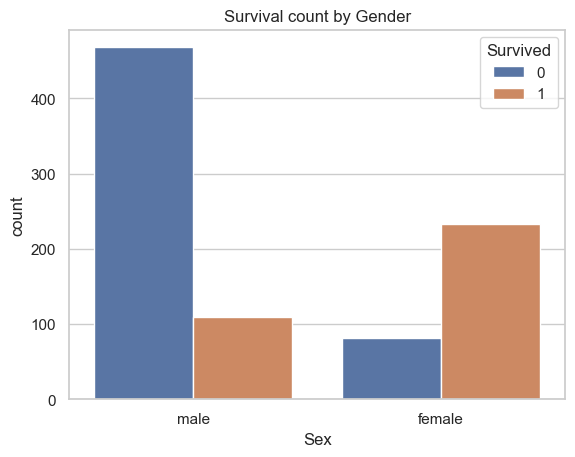

In [8]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival count by Gender")
plt.show()

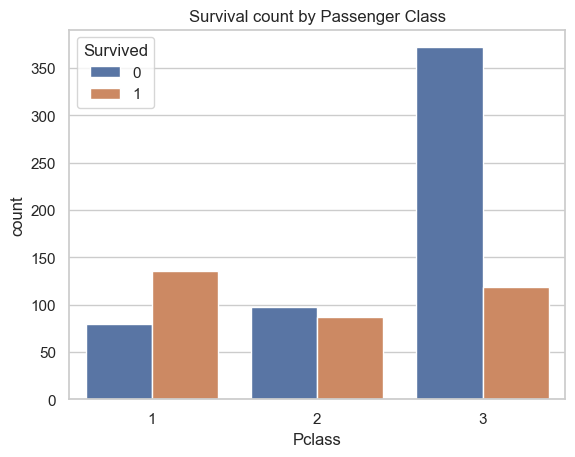

In [9]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival count by Passenger Class")
plt.show()

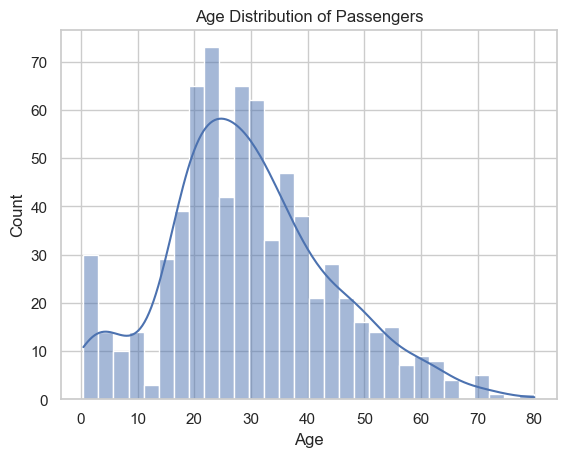

In [10]:
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution of Passengers")
plt.show()

In [11]:
print("Survived:\n", df['Survived'].value_counts())
print("\nSex:\n", df['Sex'].value_counts())
print("\nPclass:\n", df['Pclass'].value_counts())

Survived:
 Survived
0    549
1    342
Name: count, dtype: int64

Sex:
 Sex
male      577
female    314
Name: count, dtype: int64

Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [12]:
df_clean = df.copy()
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())
if 'Embarked' in df_clean.columns:
    df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])
df_clean.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

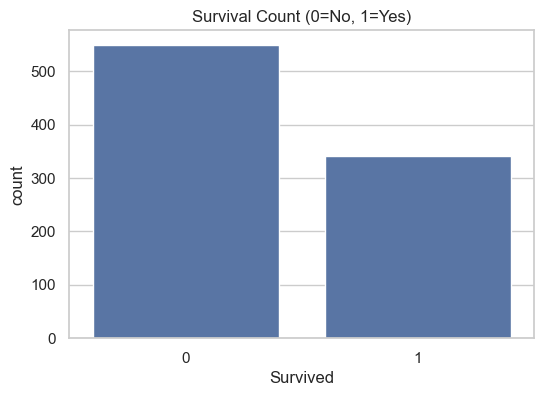

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df_clean)
plt.title('Survival Count (0=No, 1=Yes)')
plt.show()

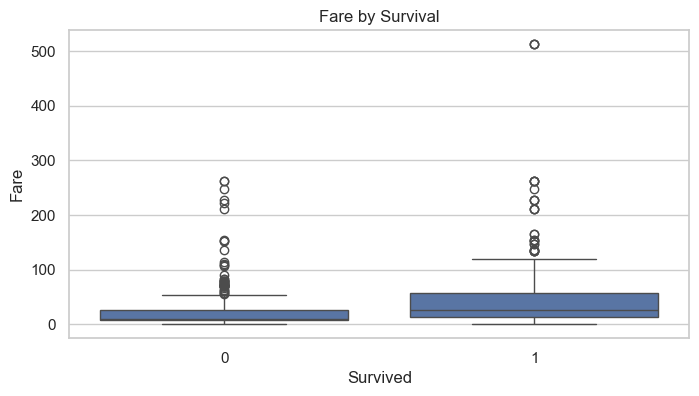

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Survived', y='Fare', data=df_clean)
plt.title('Fare by Survival')
plt.show()

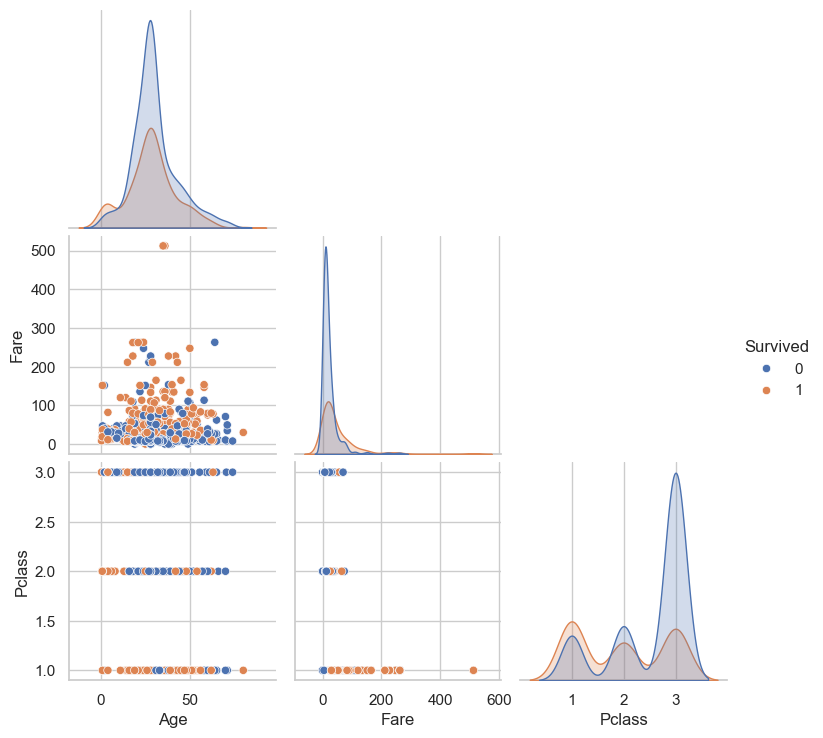

In [15]:
sns.pairplot(df_clean[['Survived','Age','Fare','Pclass']].dropna(), hue='Survived', corner=True)

## Observations
- Female passengers had higher survival rates than male passengers.
- First-class passengers had higher survival than 2nd and 3rd class.
- Most passengers were young adults (age ~20–35).
- Higher fare appears correlated with higher survival chances.
- Missing values were present in Age and Embarked; Age was filled with median for analysis.

## Summary of Findings
- Gender and passenger class strongly influenced survival.
- Data cleaning (filling Age and Embarked) made visual analysis possible.
- Next steps: feature engineering, predictive modeling, or deeper analysis by groups (e.g., by Embarked).